## Data Loading

In [1]:
import pandas as pd

# Load dataset
df_train = pd.read_csv("./data/flood_prediction.csv")
df_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [2]:
# Drop id column
df_train.drop('id', axis=1, inplace=True)
df_train.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


## Data Preparation

### Assess dataset

In [3]:
# Show info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null 

In [4]:
# Check data quality
df_train.describe(include="all")

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,4.949230e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,2.083324e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.800000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [5]:
# Check missing values
missing_values = df_train.isnull().sum()
missing_values[missing_values > 0]

,0


### Check outliers

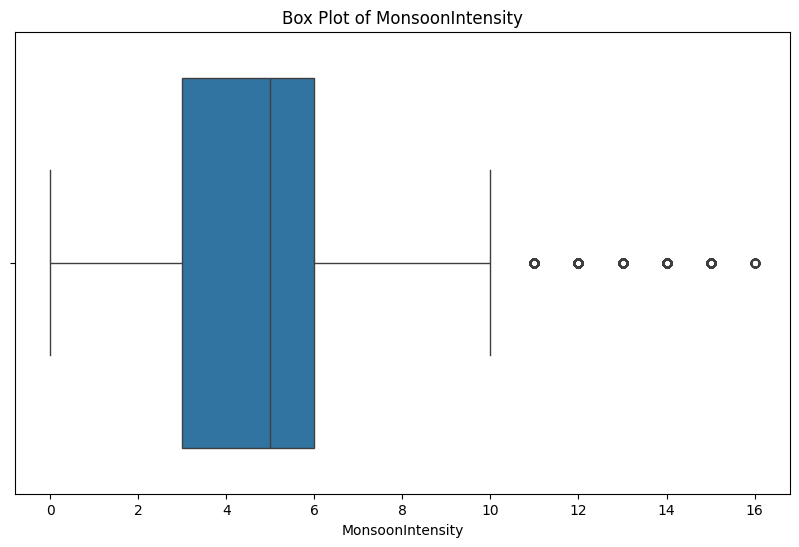

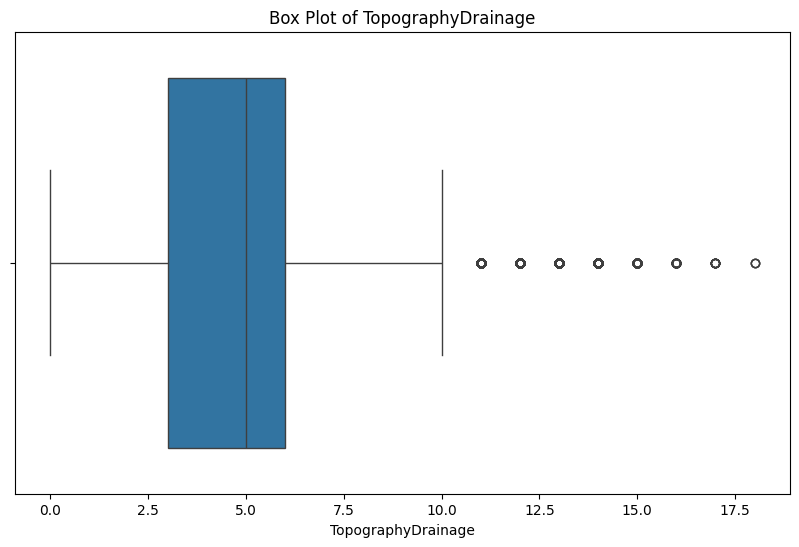

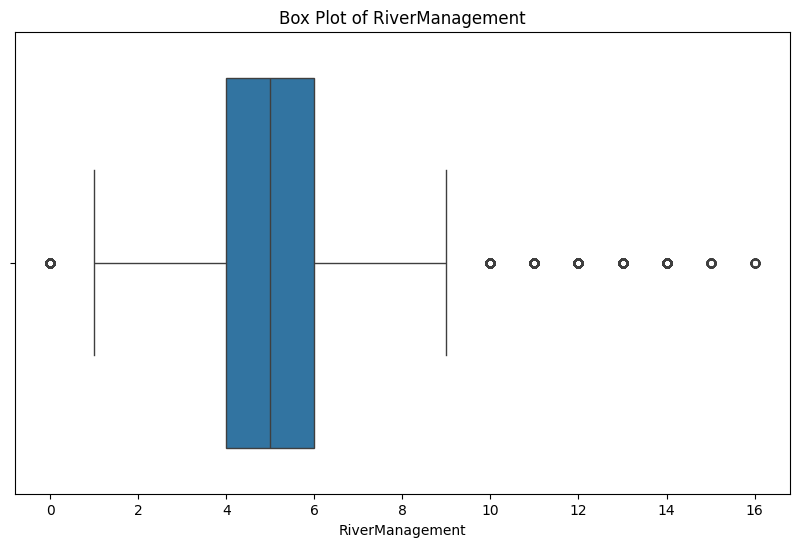

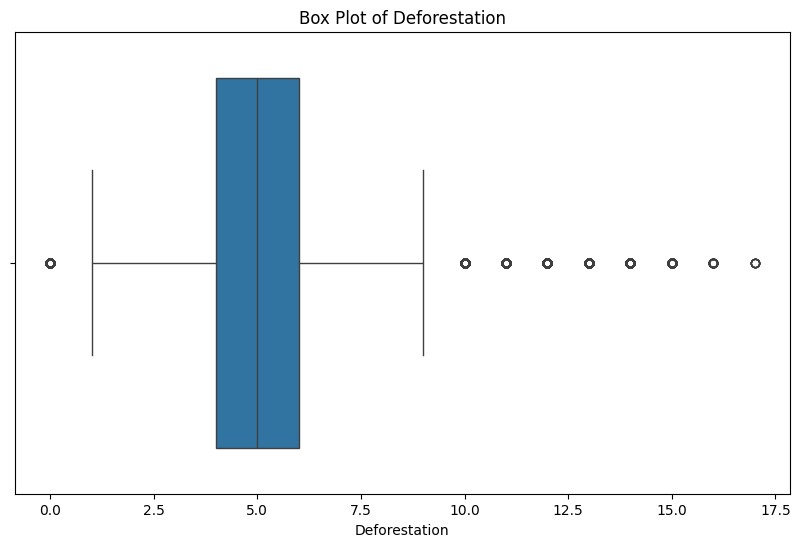

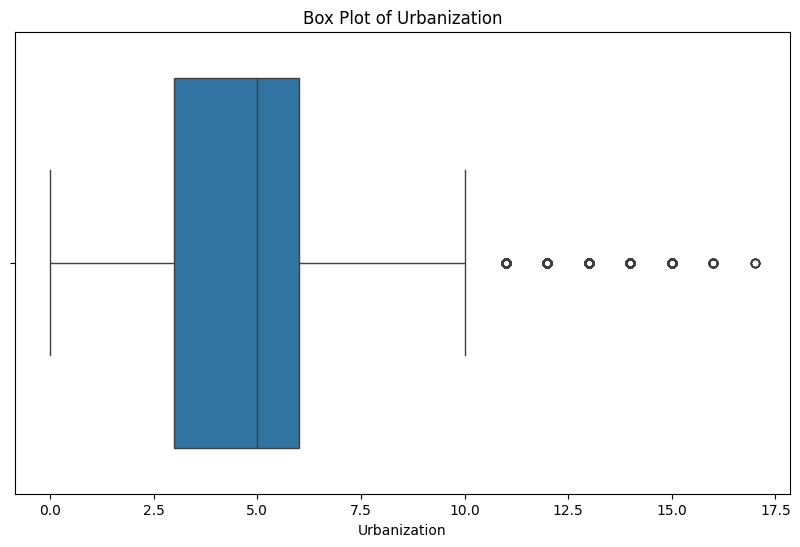

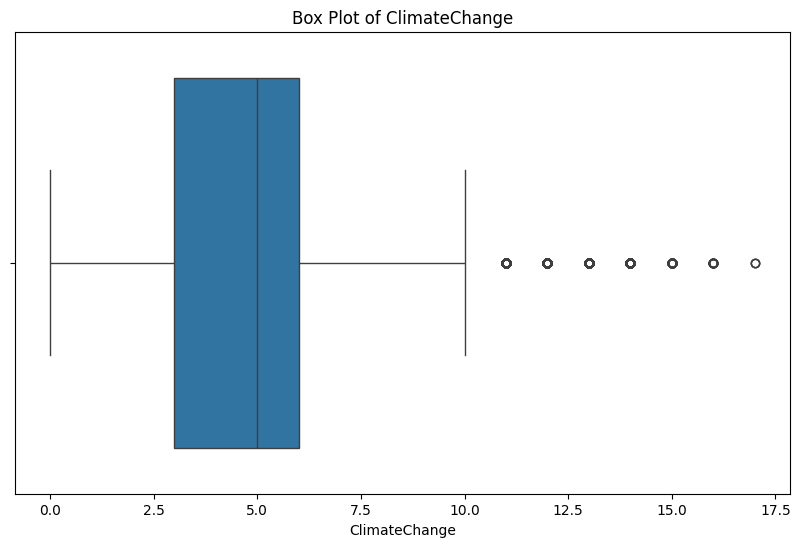

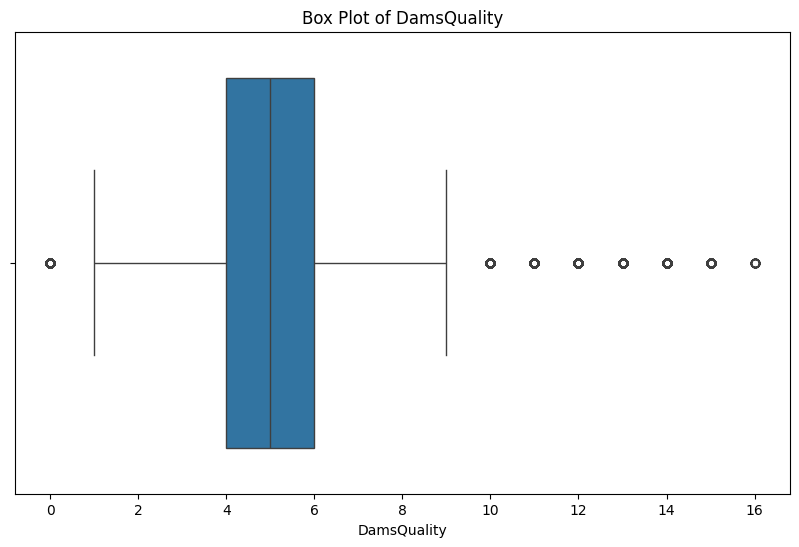

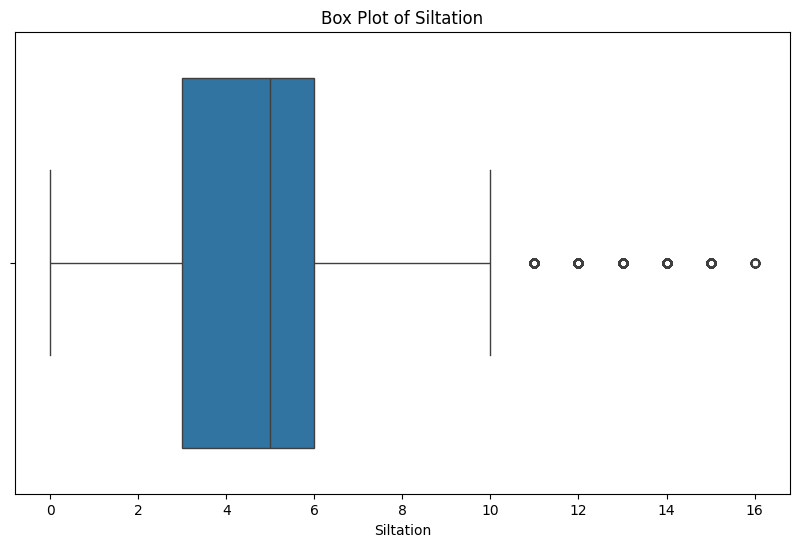

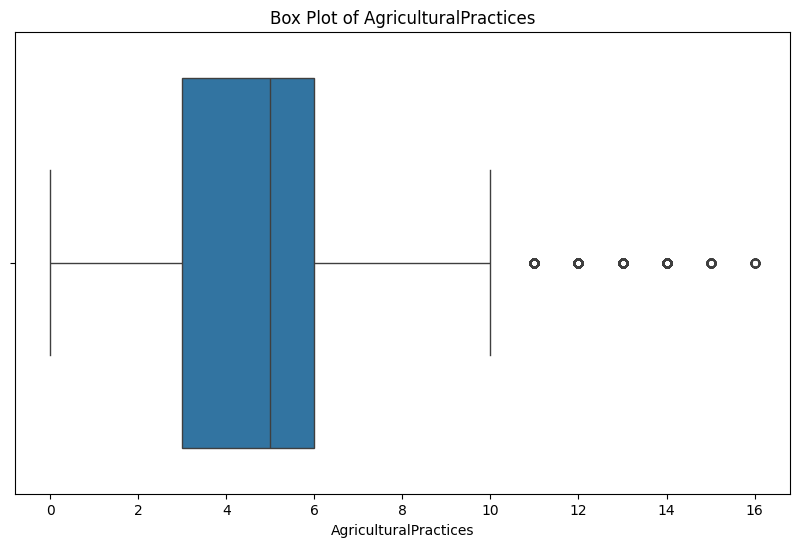

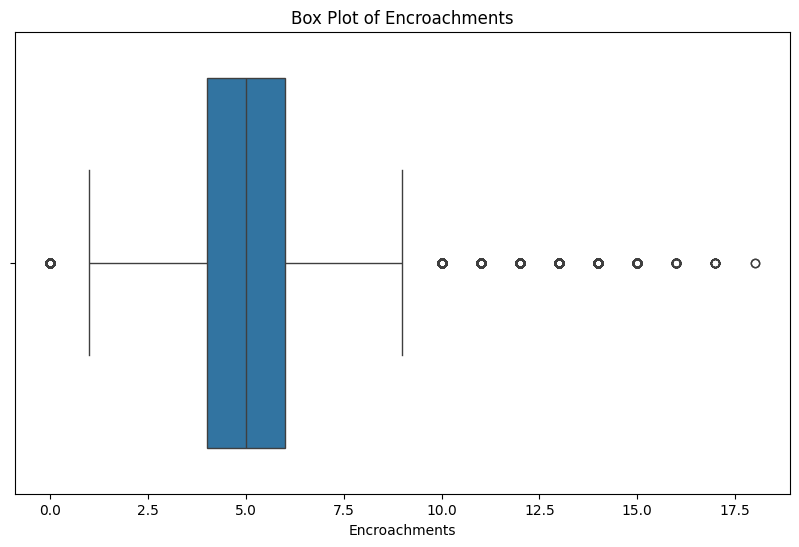

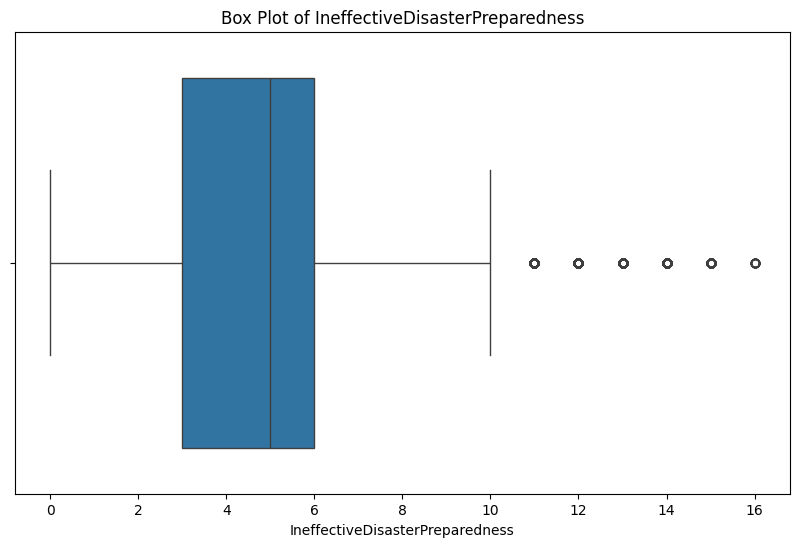

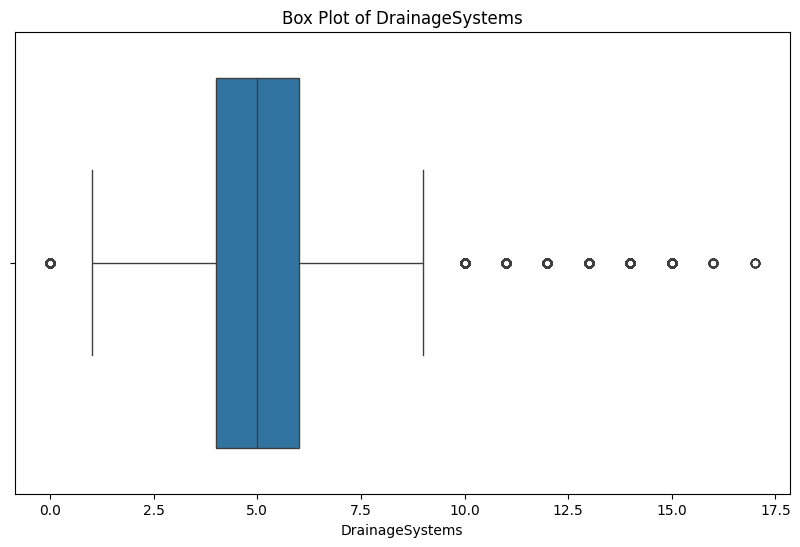

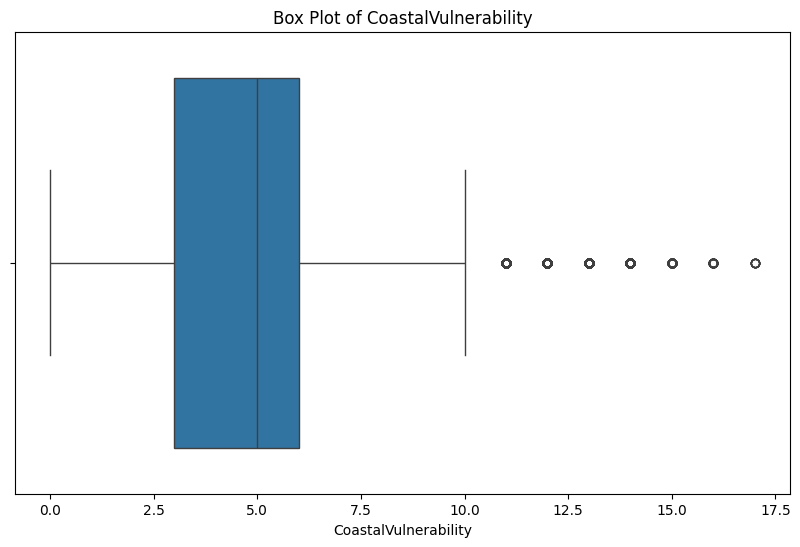

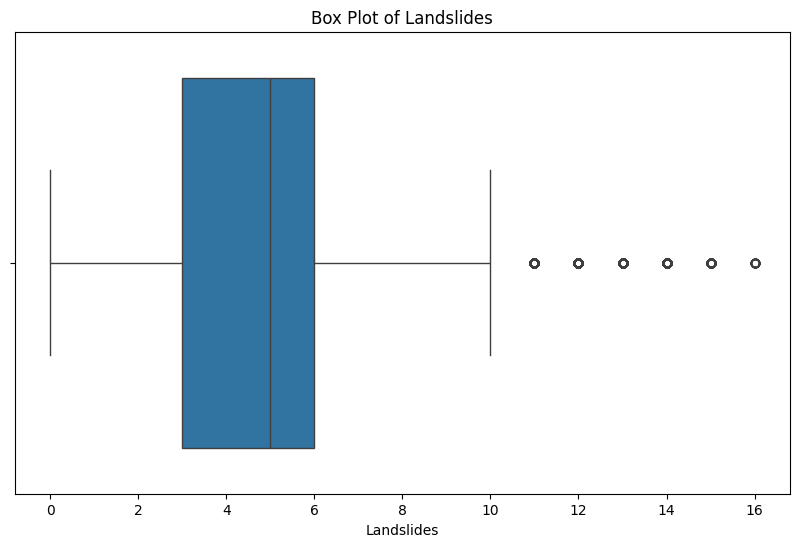

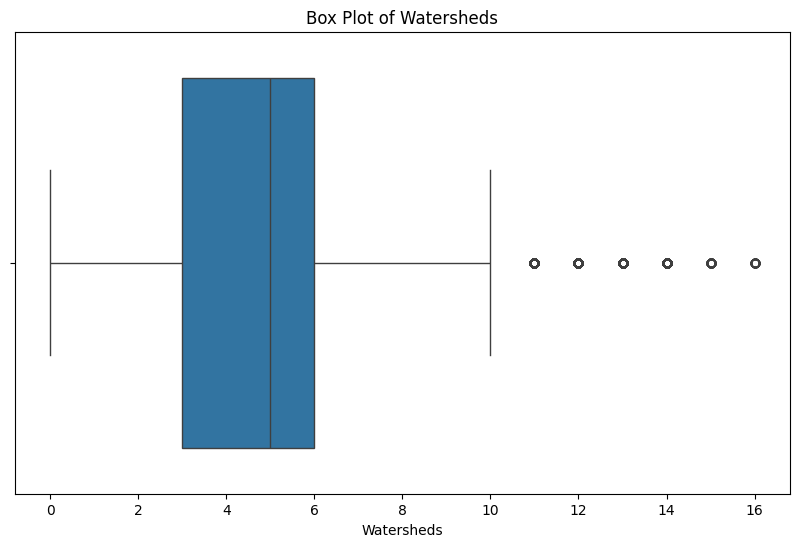

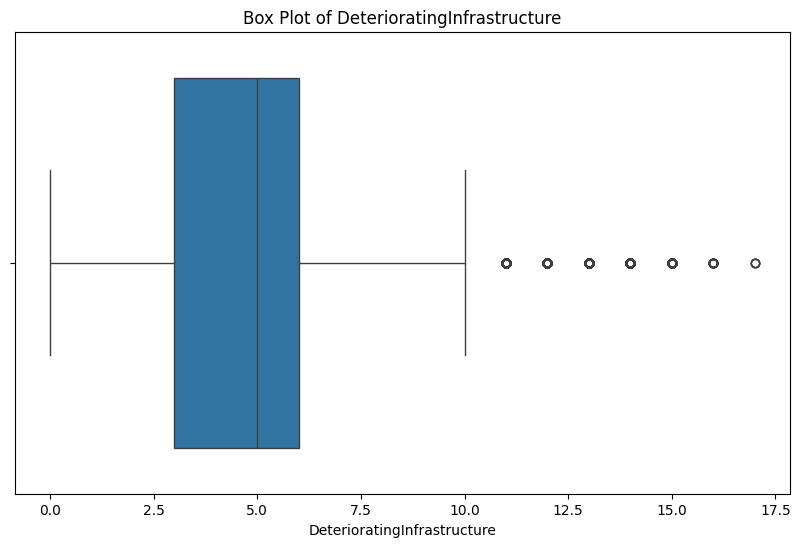

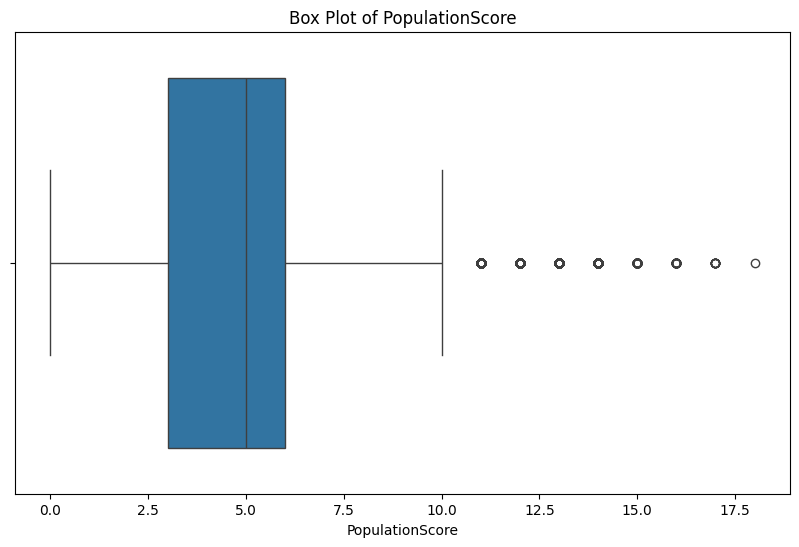

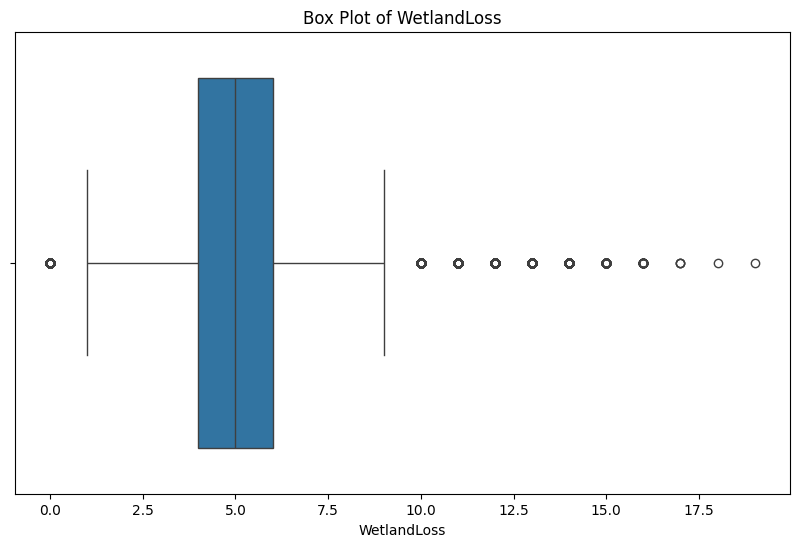

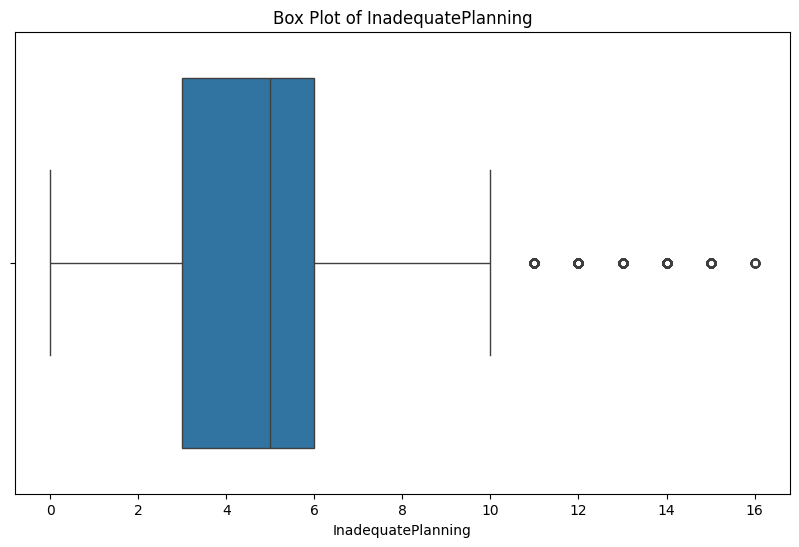

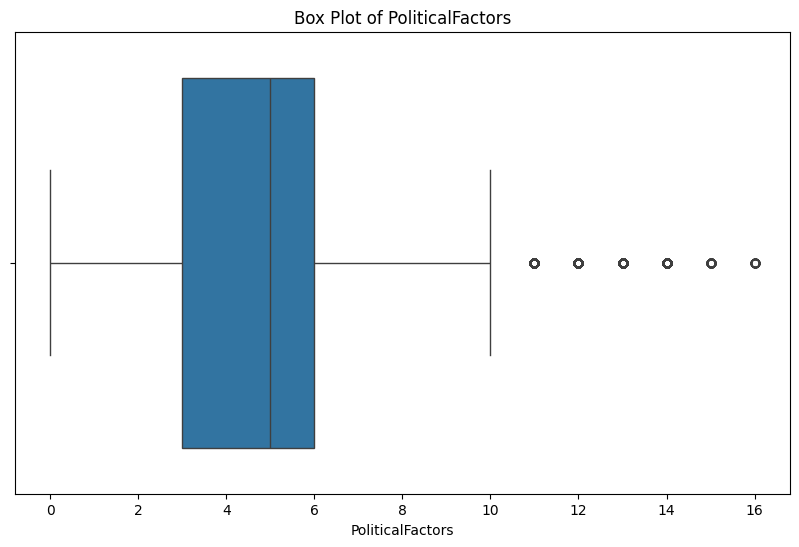

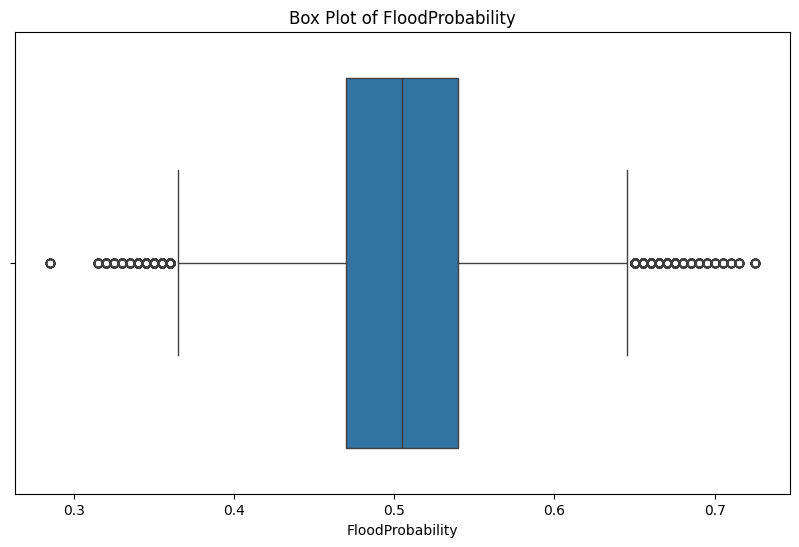

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

for feature in df_train.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_train[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [7]:
# Get IQR value
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

# Filter outliers
condition = ~((df_train < (Q1 - 1.5 * IQR)) | (df_train > (Q3 + 1.5 * IQR))).any(axis=1)
df = df_train.loc[condition, df_train.columns]

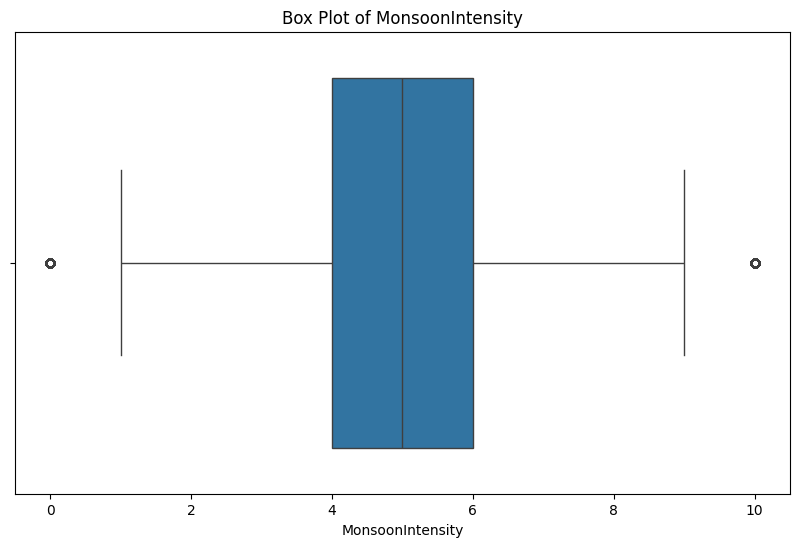

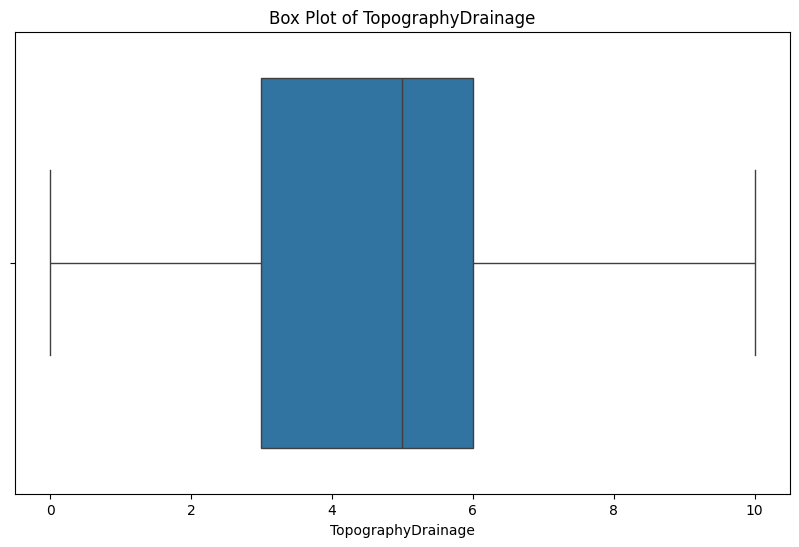

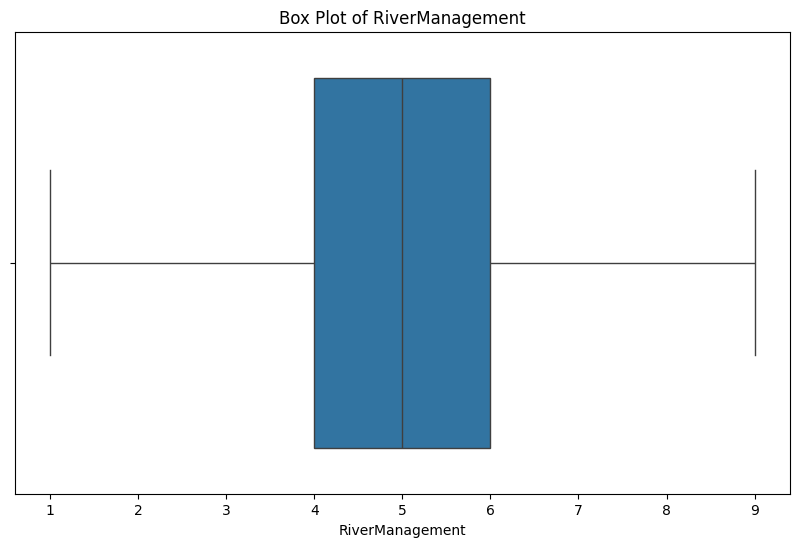

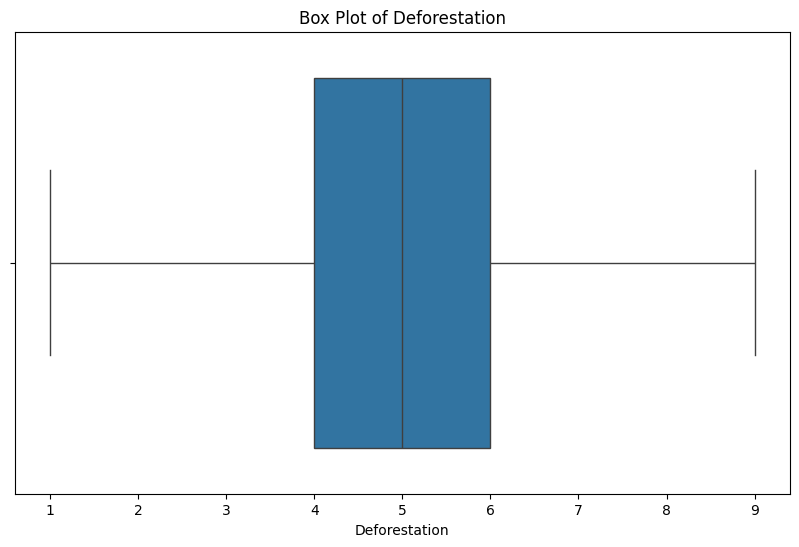

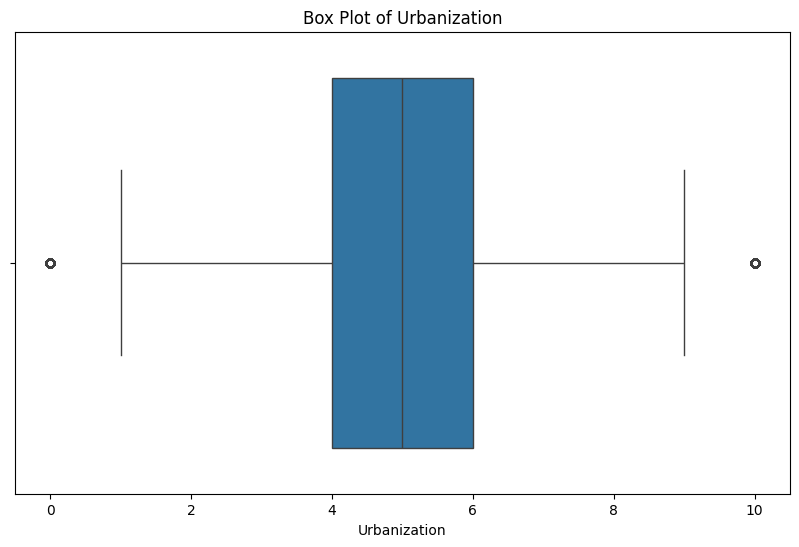

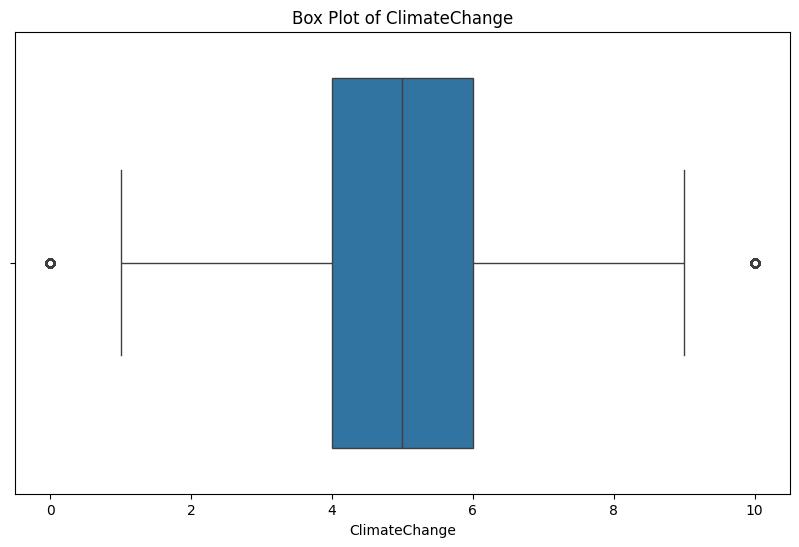

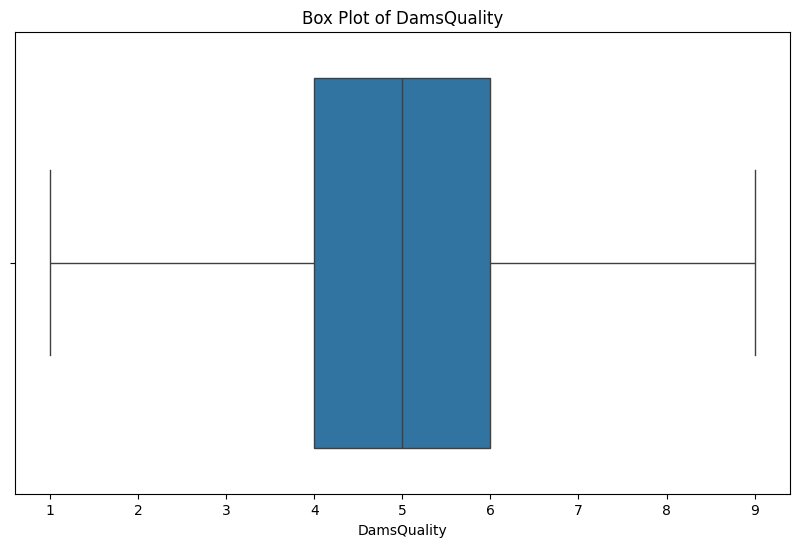

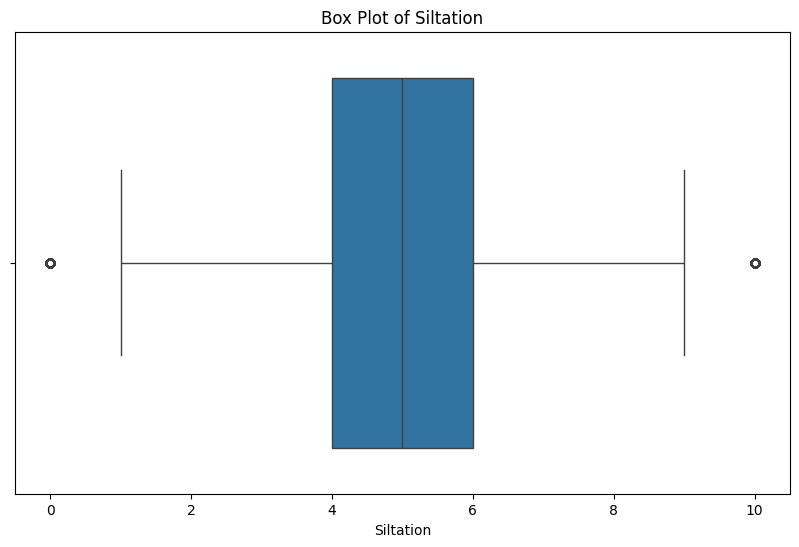

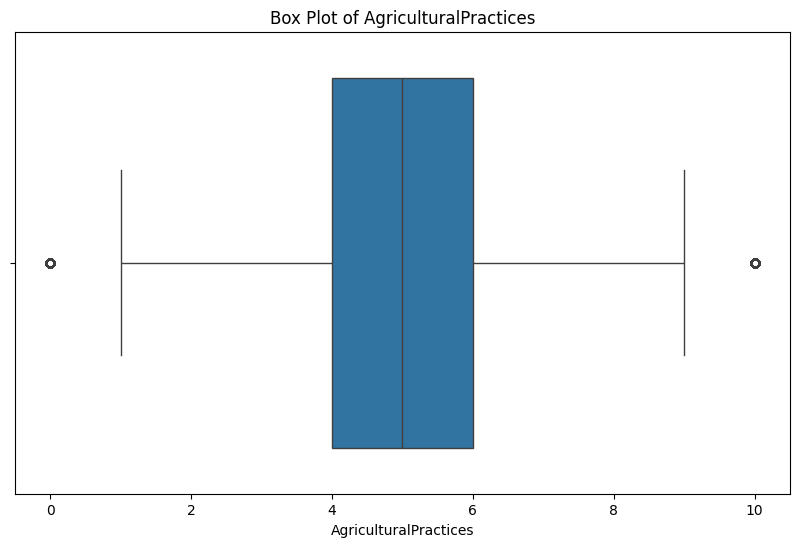

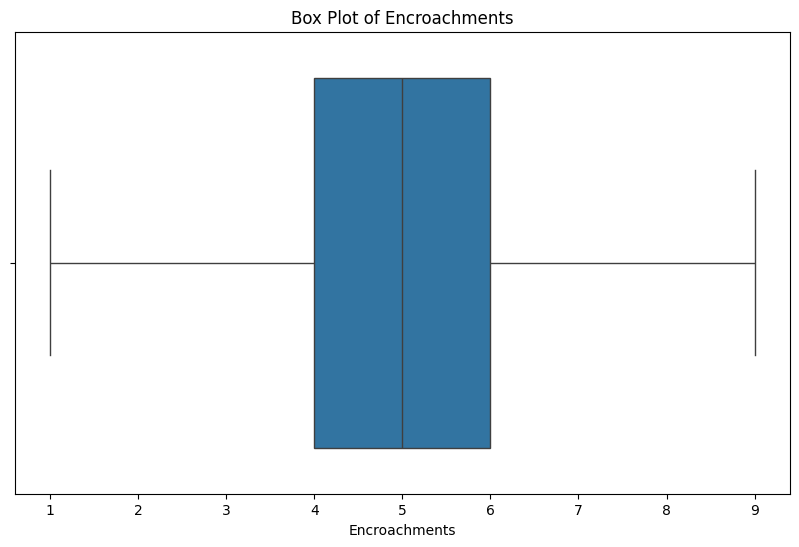

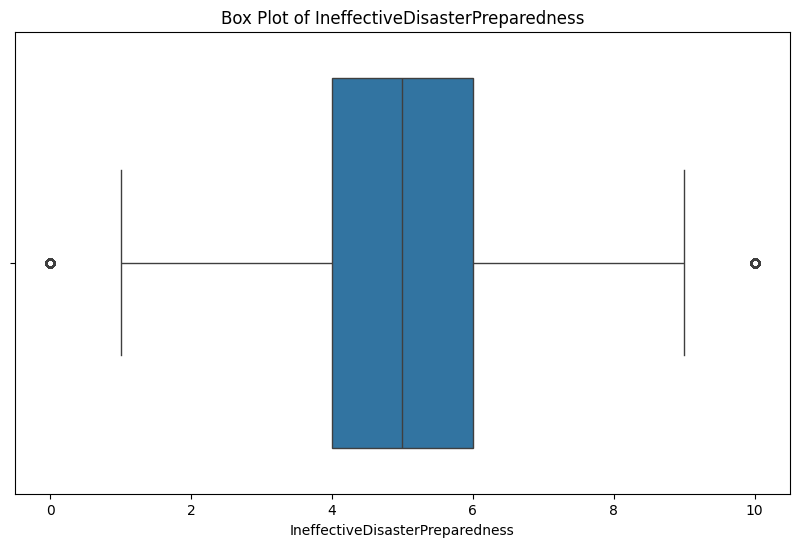

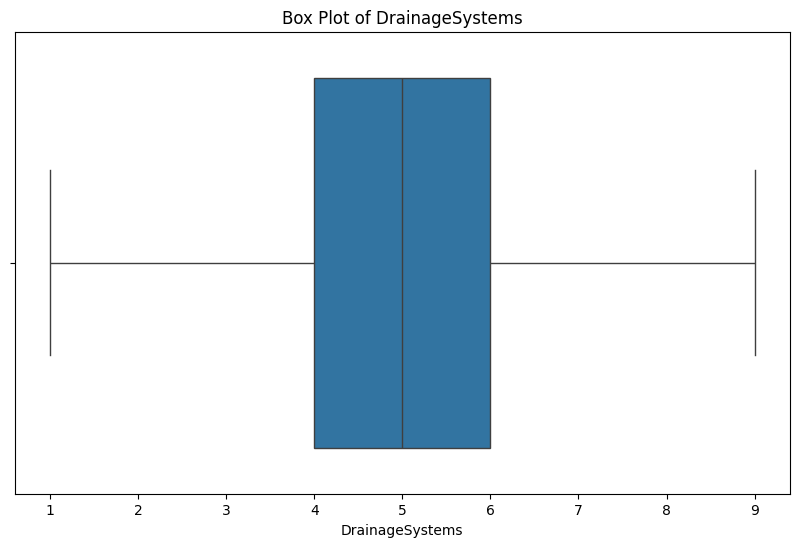

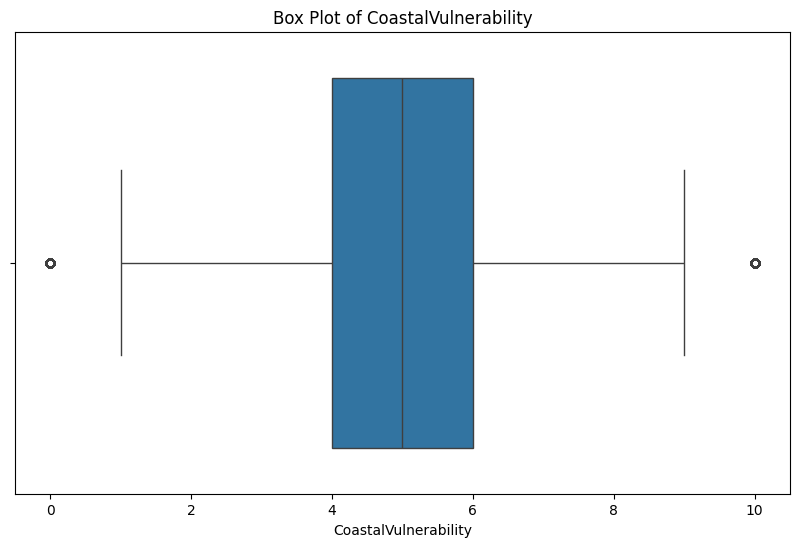

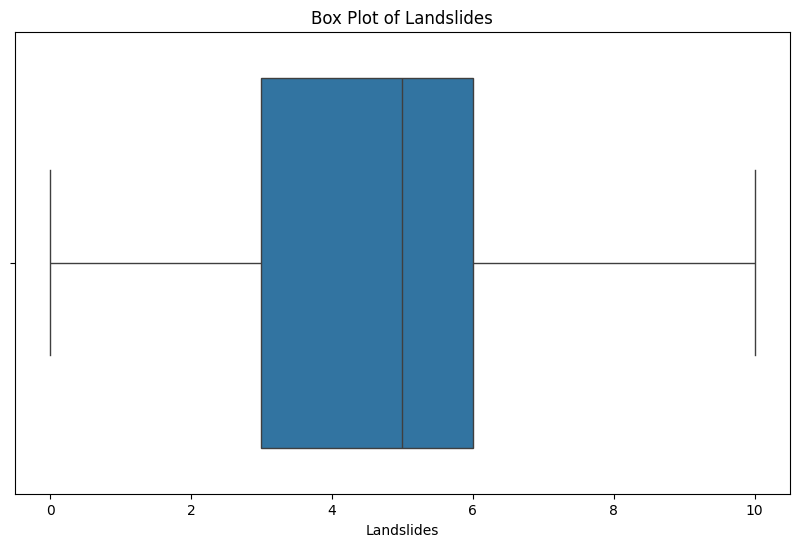

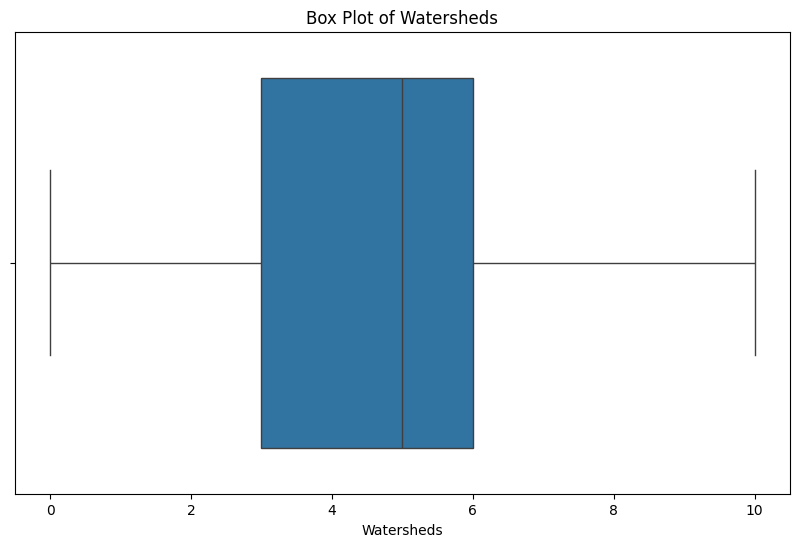

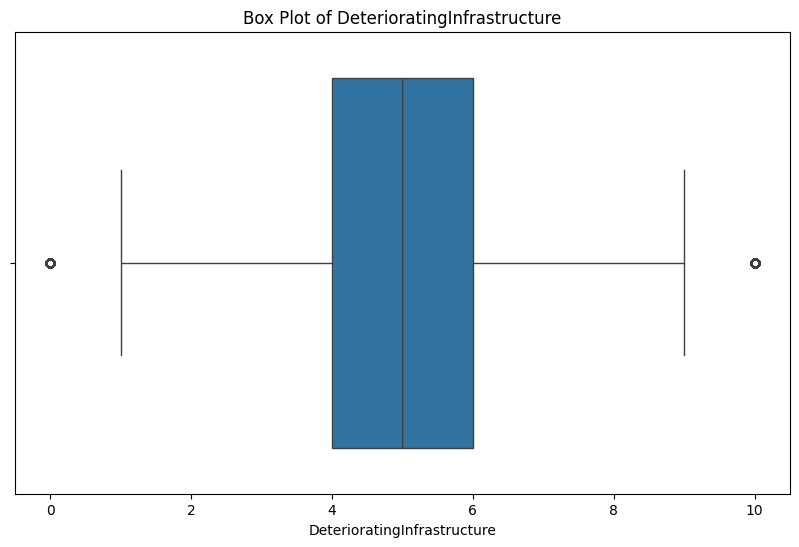

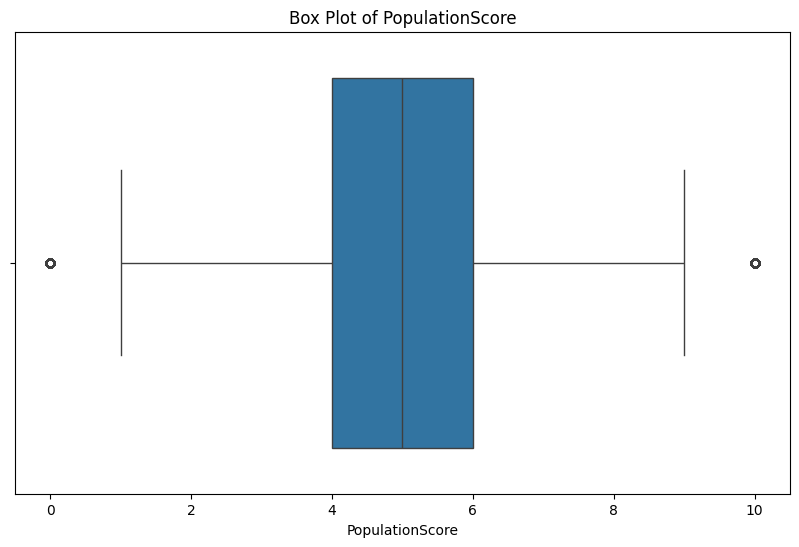

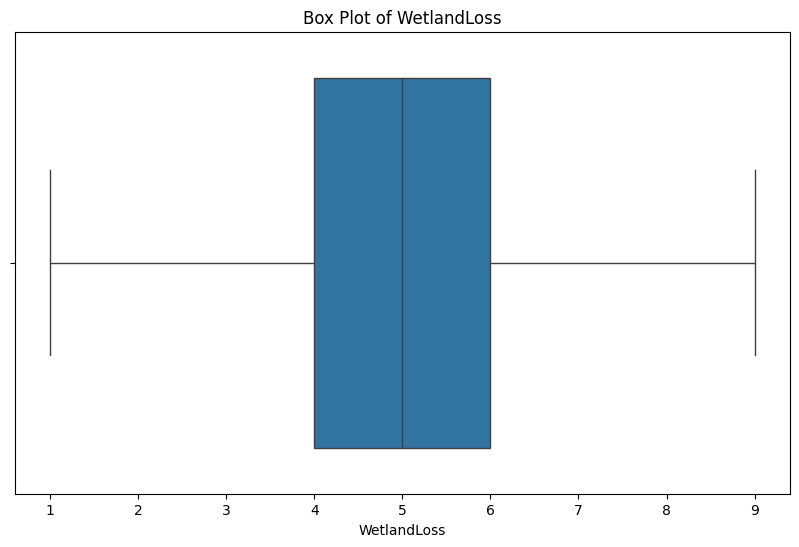

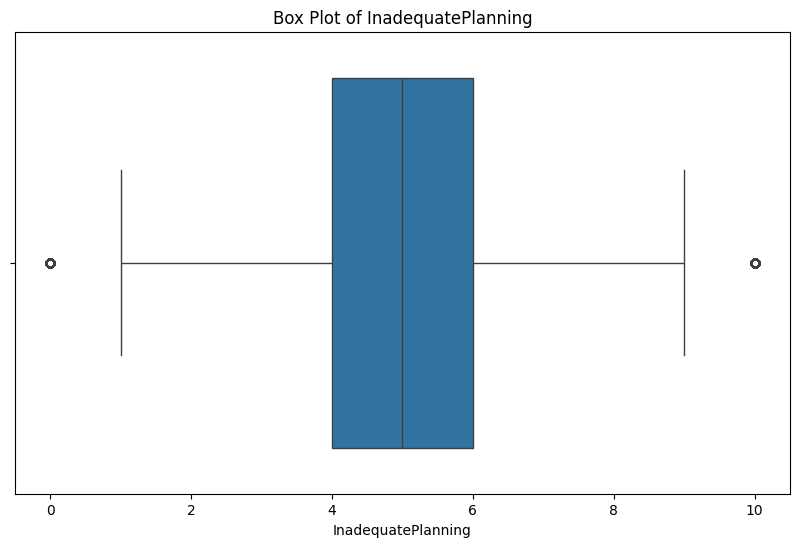

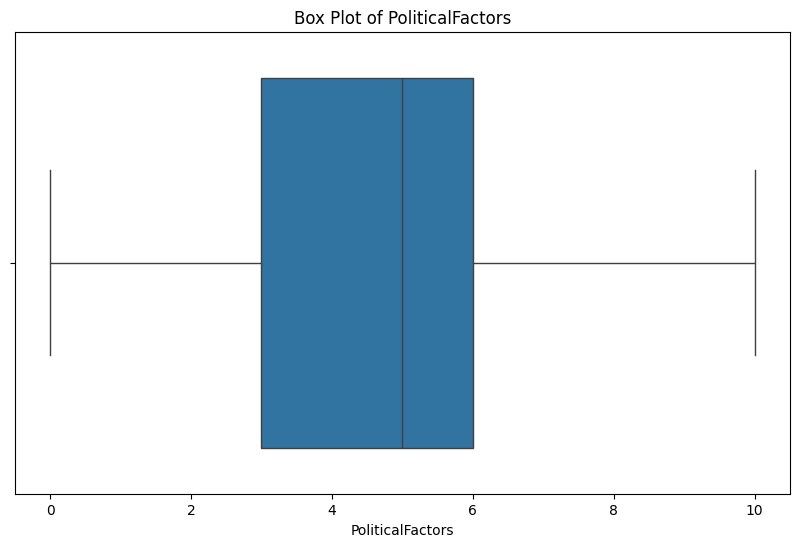

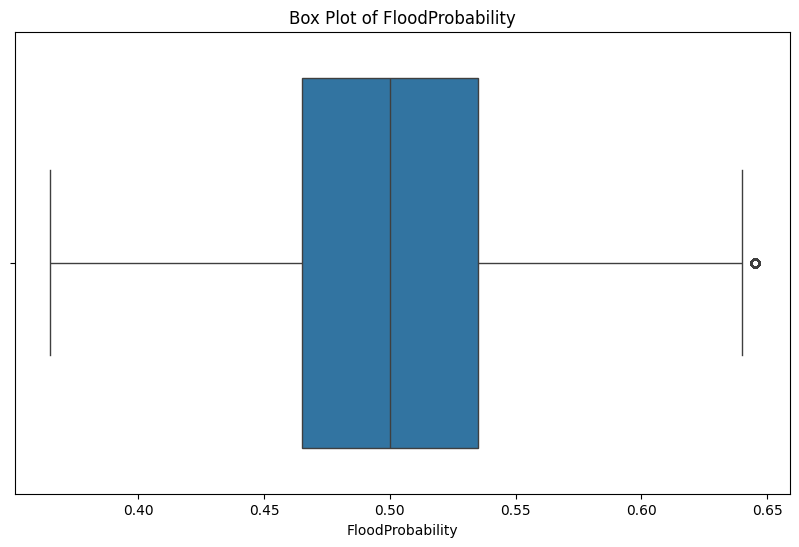

In [8]:
# Check our new data
for feature in df_train.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

### Scale dataset

Text(0.5, 1.0, 'Histogram')

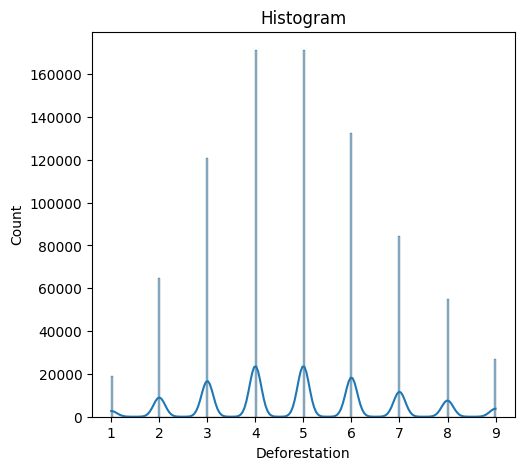

In [9]:
# Check numerical features distribution
numeric_features = df.select_dtypes(include=['number']).columns
numeric_features

# Let's check our data distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram')

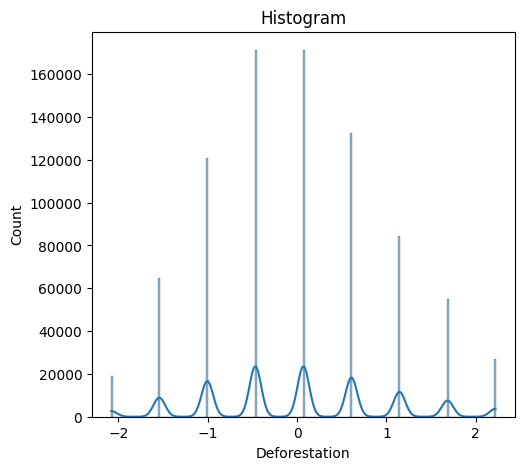

In [10]:
from sklearn.preprocessing import StandardScaler

# Standardize
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Let's check our data distribution one more time
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title("Histogram")

### Check for duplicates

In [11]:
duplicates = df.duplicated()
print("Duplicate rows: ", df[duplicates])

Duplicate rows:  Empty DataFrame
Columns: [MonsoonIntensity, TopographyDrainage, RiverManagement, Deforestation, Urbanization, ClimateChange, DamsQuality, Siltation, AgriculturalPractices, Encroachments, IneffectiveDisasterPreparedness, DrainageSystems, CoastalVulnerability, Landslides, Watersheds, DeterioratingInfrastructure, PopulationScore, WetlandLoss, InadequatePlanning, PoliticalFactors, FloodProbability]
Index: []

[0 rows x 21 columns]


## EDA

### Data Quality

In [12]:
# Let's check the quality again
df.describe(include='all')

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,...,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05,8.458860e+05
mean,-1.722920e-16,-8.252983e-18,-1.122910e-16,-1.138030e-16,-1.484907e-17,1.193637e-16,1.572309e-16,-1.516197e-17,1.194309e-16,-2.049344e-16,...,-2.232715e-17,-1.108210e-16,-1.940060e-16,-1.644633e-16,-2.222467e-16,5.821188e-17,1.895708e-16,1.429887e-16,-7.076985e-17,-6.328547e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.503498e+00,-2.449018e+00,-2.065325e+00,-2.080702e+00,-2.472198e+00,-2.500029e+00,-2.062896e+00,-2.487267e+00,-2.487272e+00,-2.057707e+00,...,-2.066946e+00,-2.475094e+00,-2.465862e+00,-2.464520e+00,-2.485485e+00,-2.478098e+00,-2.067744e+00,-2.472204e+00,-2.463924e+00,-2.759991e+00
25%,-4.542981e-01,-9.492630e-01,-4.681183e-01,-4.675365e-01,-4.615469e-01,-4.631232e-01,-4.656514e-01,-4.564057e-01,-4.636059e-01,-4.613276e-01,...,-4.634462e-01,-4.649776e-01,-9.579532e-01,-9.577833e-01,-4.547982e-01,-4.547462e-01,-4.655010e-01,-4.602404e-01,-9.593186e-01,-7.136972e-01
50%,5.800187e-02,5.057361e-02,6.428396e-02,7.018534e-02,4.111574e-02,4.610324e-02,6.676350e-02,5.130956e-02,4.231074e-02,7.079869e-02,...,7.105385e-02,3.755159e-02,4.731955e-02,4.670802e-02,5.287338e-02,5.109174e-02,6.857993e-02,4.275047e-02,4.375149e-02,2.505596e-03
75%,5.703019e-01,5.504919e-01,5.966862e-01,6.079072e-01,5.437784e-01,5.553296e-01,5.991784e-01,5.590249e-01,5.482274e-01,6.029250e-01,...,6.055539e-01,5.400808e-01,5.499559e-01,5.489537e-01,5.605450e-01,5.569297e-01,6.026608e-01,5.457413e-01,5.452865e-01,7.187084e-01
max,2.619502e+00,2.550165e+00,2.193893e+00,2.221073e+00,2.554429e+00,2.592235e+00,2.196423e+00,2.589886e+00,2.571894e+00,2.199304e+00,...,2.209054e+00,2.550197e+00,2.560501e+00,2.557936e+00,2.591231e+00,2.580282e+00,2.204904e+00,2.557705e+00,2.551427e+00,2.969631e+00


Standard deviation value being close to one and having similar range among columns means that we have a good quality dataset

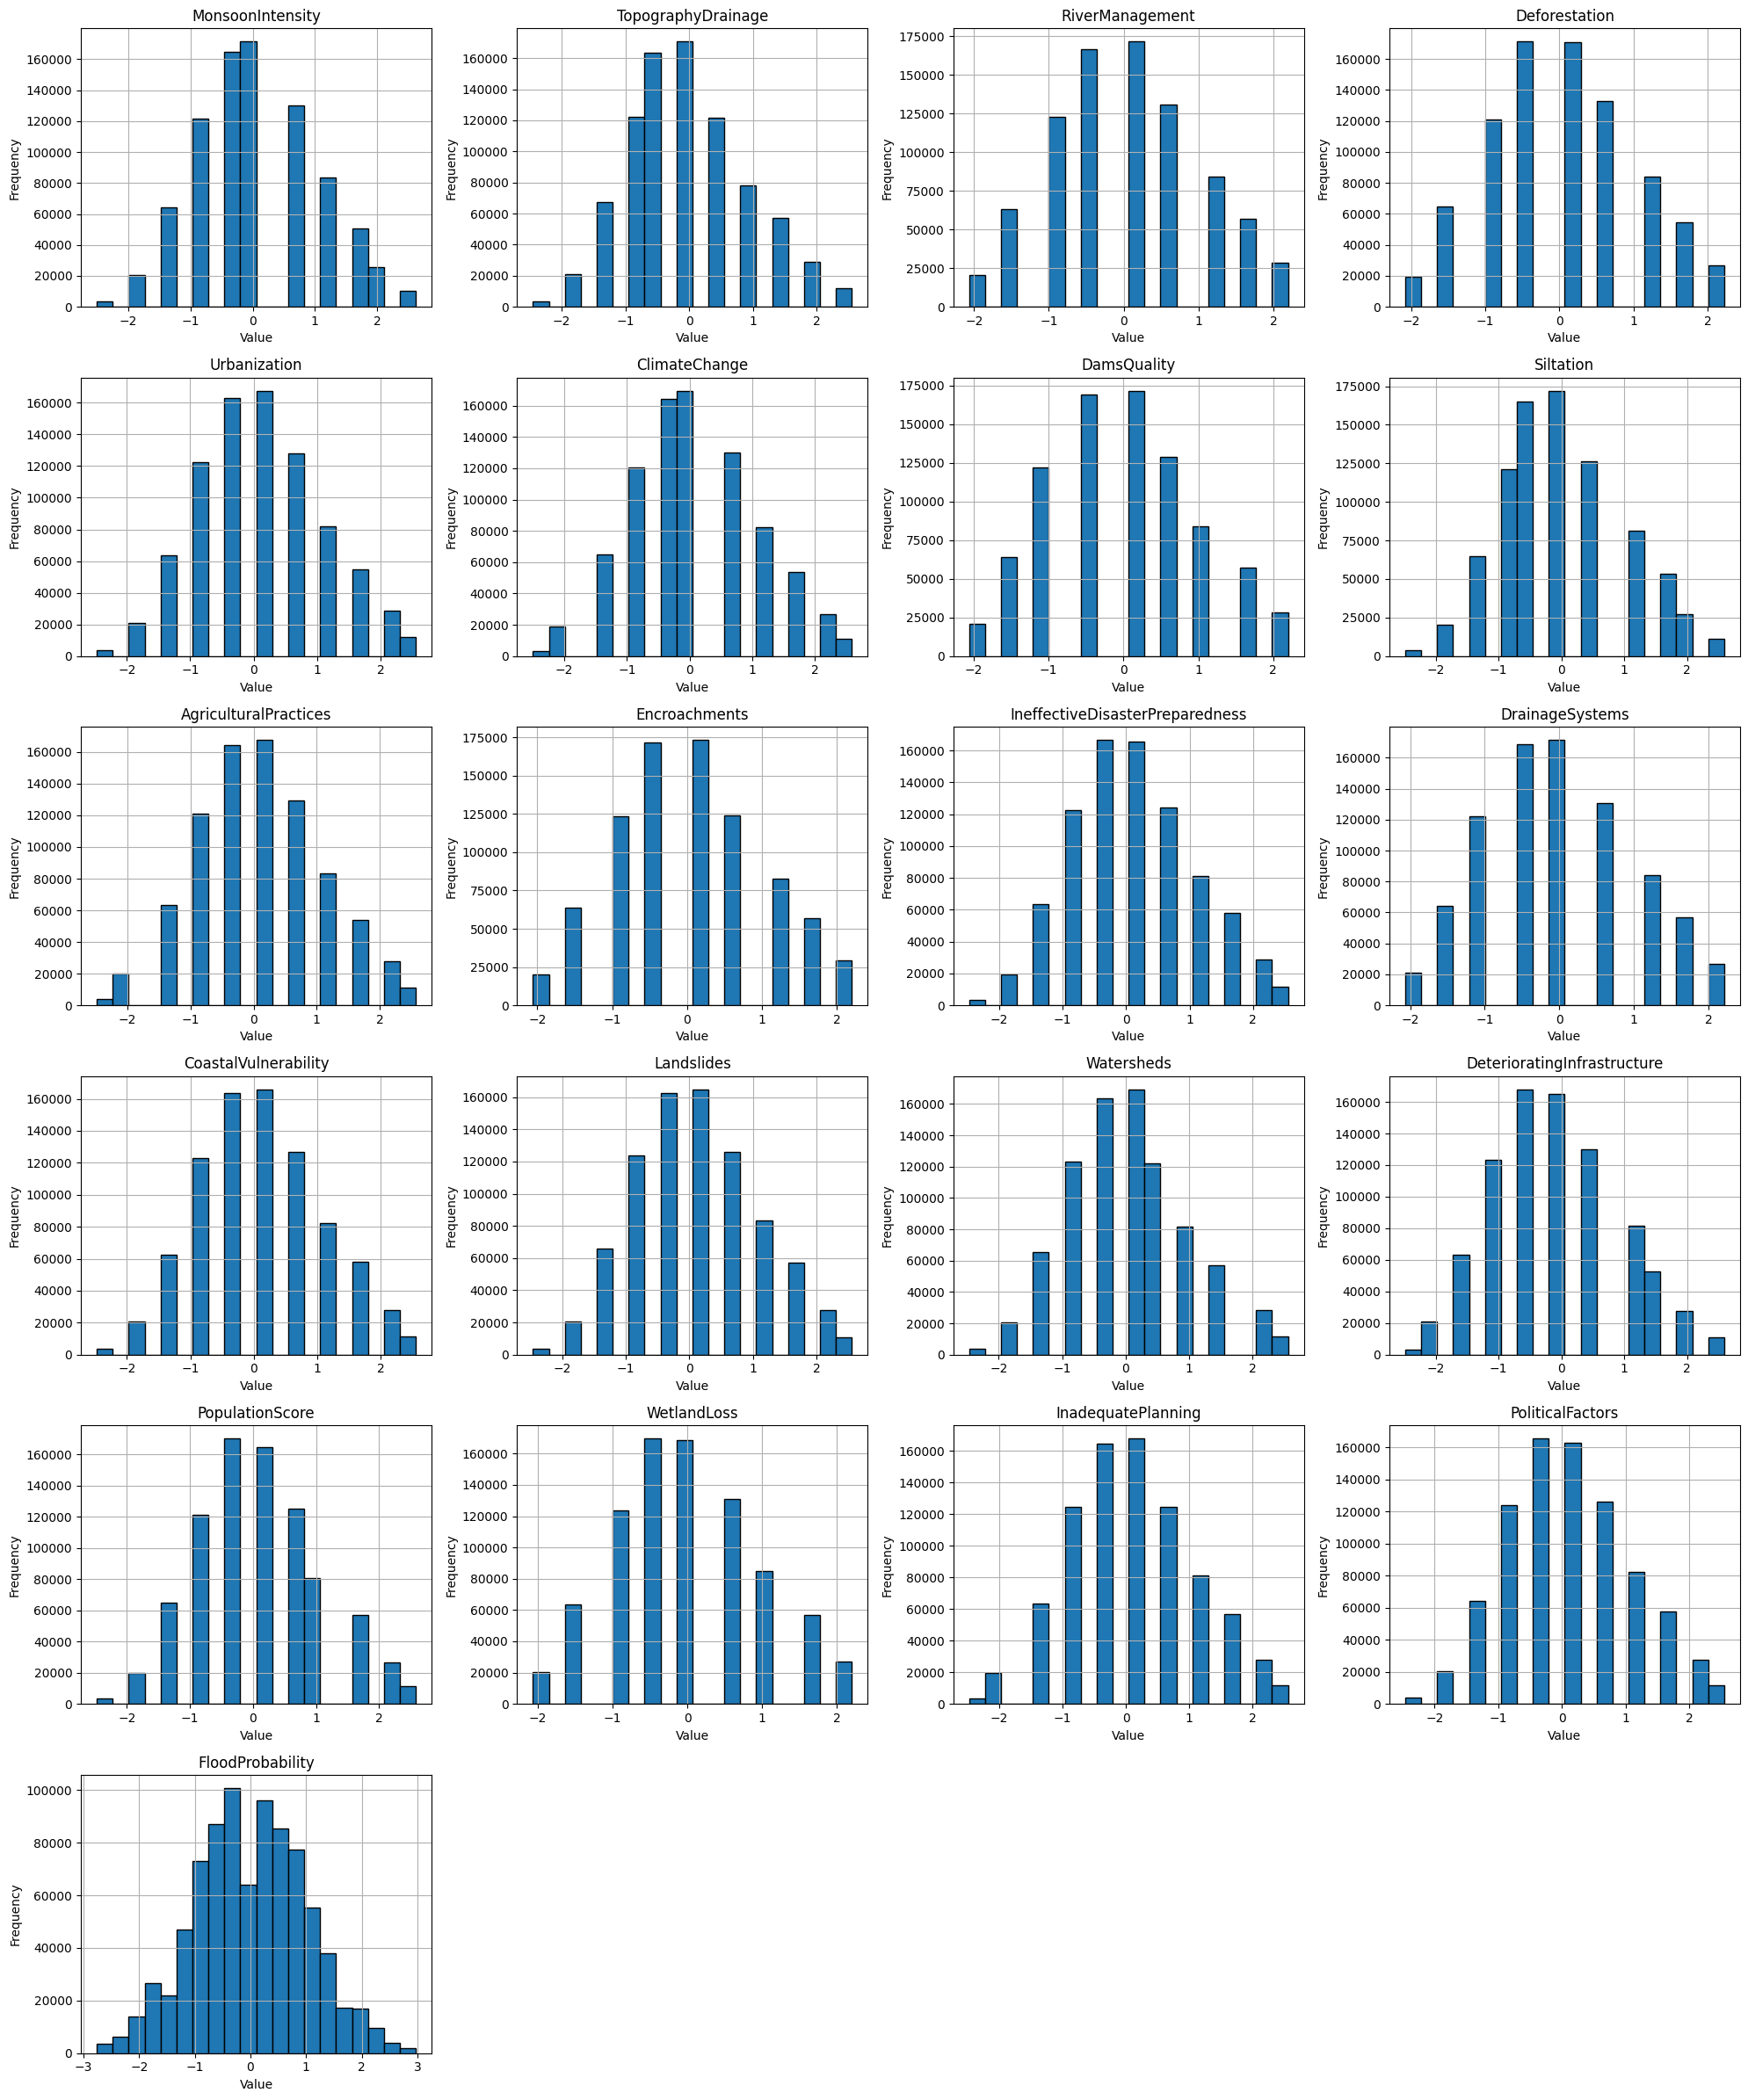

In [13]:
# Create bar graphs
num_vars = df.shape[1]
n_cols = 4
n_rows = -(-num_vars // n_cols)  # Ceiling division

# Subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

# Plot each variable
for i, column in enumerate(df.columns):
    df[column].hist(ax=axes[i], bins=20, edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Delete unused columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show
plt.tight_layout()
plt.show()

### Correlation

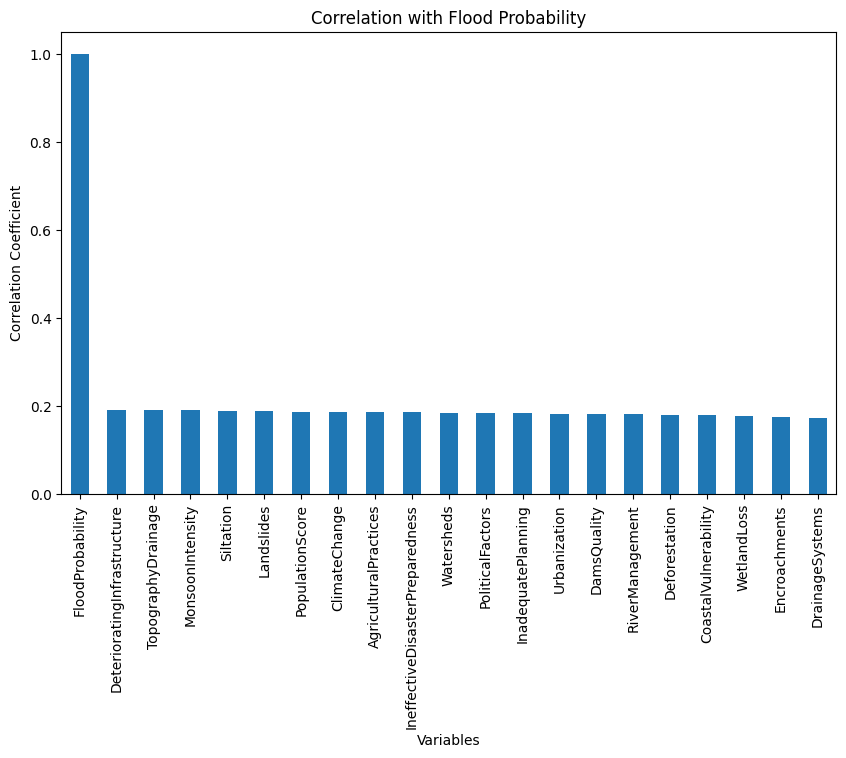

In [14]:
# Calculate correlations with 'FloodProbability' column
target_corr = df.corr()['FloodProbability']

# Sort the scores in ascending order
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

# Show
plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')
plt.title(f'Correlation with Flood Probability')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')
plt.show()

## Data Splitting

In [15]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Define our features and target
X = df.drop(columns=['FloodProbability'])
y = df['FloodProbability']

# Dived dataset into training and testing parts
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Check total dataset
print("Total: ",len(X))
print("Training: ",len(x_train))
print("Test: ",len(x_test))

Total:  845886
Training:  676708
Test:  169178


## Model Development

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def eval(model, x_test, y_test):
  y_pred = model.predict(x_test)
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print(f"MAE: {mae}")
  print(f"MSE: {mse}")
  print(f"R²: {r2}")

  results = {
      'MAE': mae,
      'MSE': mse,
      'R²': r2
  }

  return results

### LARS

In [17]:
# Train
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

In [18]:
# Evaluate
lars_eval = eval(lars, x_test, y_test)

MAE: 0.8064965862112844
MSE: 0.9982455301765661
R²: 0.0007638833508322174


### Linear Regression

In [19]:
# Train
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)

In [20]:
# Evaluate
lr_eval = eval(LR, x_test, y_test)

MAE: 0.3291416529981243
MSE: 0.1712951124823055
R²: 0.8285349066701793


### Gradient Boosting Regressor

In [21]:
# Train
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(random_state=184)

In [22]:
# Evaluate
gbr_eval = eval(GBR, x_test, y_test)

MAE: 0.5126715936448324
MSE: 0.3804907514322631
R²: 0.6191316771387397


### Evaluate

In [23]:
# Collect results into a dictionary
results = {
    'Least Angle Regression (LARS)': lars_eval,
    'Linear Regression': lr_eval,
    'Gradient Boosting Regressor (GBR)': gbr_eval
}

# Create a DataFrame to summarize results
summary_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'R²'])

# Fill DataFrame
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'MAE': metrics['MAE'],
        'MSE': metrics['MSE'],
        'R²': metrics['R²']
    })

# Convert list of dictionaries to DataFrame
summary_df = pd.DataFrame(rows)
summary_df

,Model,MAE,MSE,R²
0,Least Angle Regression (LARS),0.806497,0.998246,0.000764
1,Linear Regression,0.329142,0.171295,0.828535
2,Gradient Boosting Regressor (GBR),0.512672,0.380491,0.619132


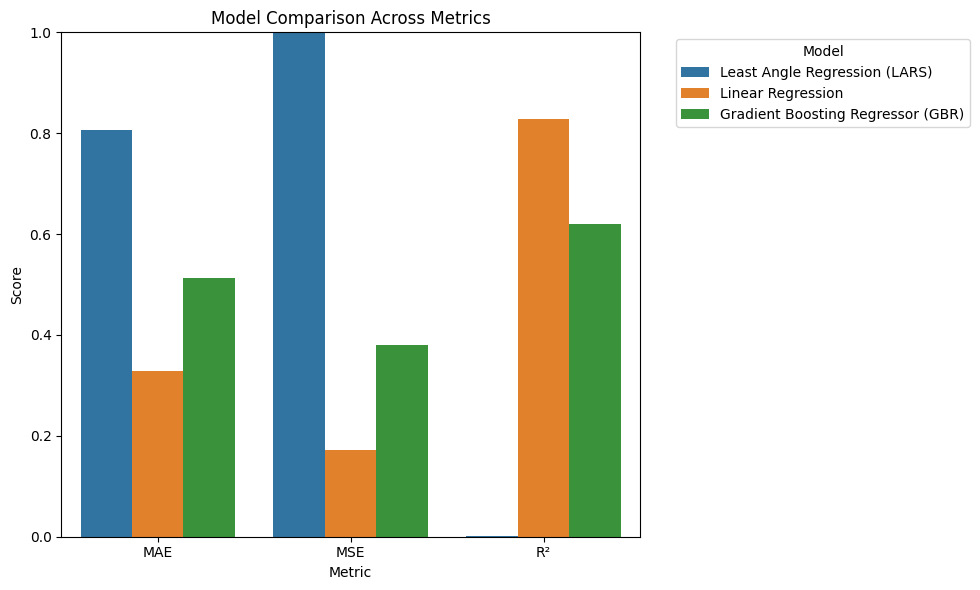

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Melt the DataFrame
long_df = pd.melt(summary_df, id_vars='Model', var_name='Metric', value_name='Score')

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=long_df, x='Metric', y='Score', hue='Model')

plt.title('Model Comparison Across Metrics')
plt.ylim(0, 1)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

LARS had the worst performance among the three, with mse and mae are noticeably higher and extremely low r2. It seems Linear Regression had the best overall scores on these metrics, by having the lowest on both mse and mae, while having the highest on r2.